**Quantum Fourier Transform**

In [9]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer

31- qubit QFT implementation from scratch

Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))


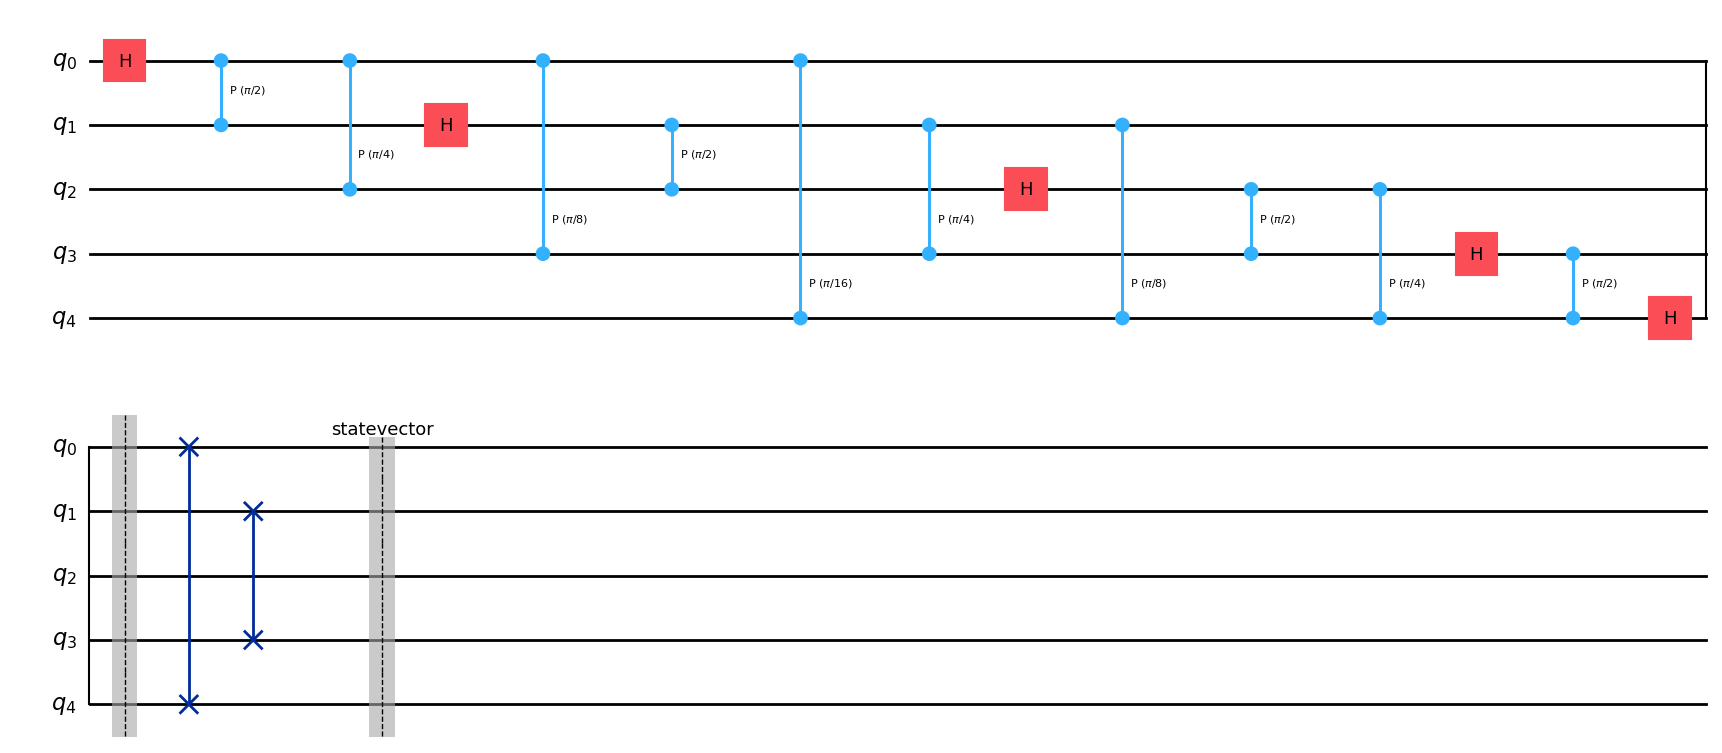

In [10]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_circuit_layout

def qft_circuit(n):
    qc = QuantumCircuit(n)
    # Apply QFT
    for j in range(n):
        qc.h(j)
        for k in range(j+1,n):
            angle = 2*np.pi/2**(k-j+1)
            qc.cp(angle,k,j)  # cp(angle, control, target)
    qc.barrier()
    # Swap qubits to reverse order
    for i in range(n//2):
        qc.swap(i,n-i-1)
    return qc

# Number of qubits
n = 5
qc = qft_circuit(n)

# Save the statevector
qc.save_statevector()

# Create simulator and transpile circuit
sim = AerSimulator()
tqc = transpile(qc, sim)

# Run simulation
result = sim.run(tqc).result()
statevector = result.data(0)['statevector']
print(statevector)

# Draw the circuit (optional)
qc.draw(output="mpl", style="iqp")
